In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore')

# Lesson 12: Practice with Tables

## Billionaires

In [2]:
billionaires = Table.read_table('data/billionaires.csv')
billionaires

name,net worth,citizenship,industry
Jeff Bezos,115739645754,United States,Technology
Bill Gates,115488591742,United States,Technology
Bernard Arnault,102244728472,France,Consumer
Warren Buffett,89408278188,United States,Diversified
Mark Zuckerberg,83053011017,United States,Technology
Amancio Ortega,73839366133,Spain,Retail
Larry Page,69933009751,United States,Technology
Sergey Brin,67825250468,United States,Technology
Carlos Slim,62527178289,Mexico,Diversified
Charles Koch,61046822719,United States,Industrial


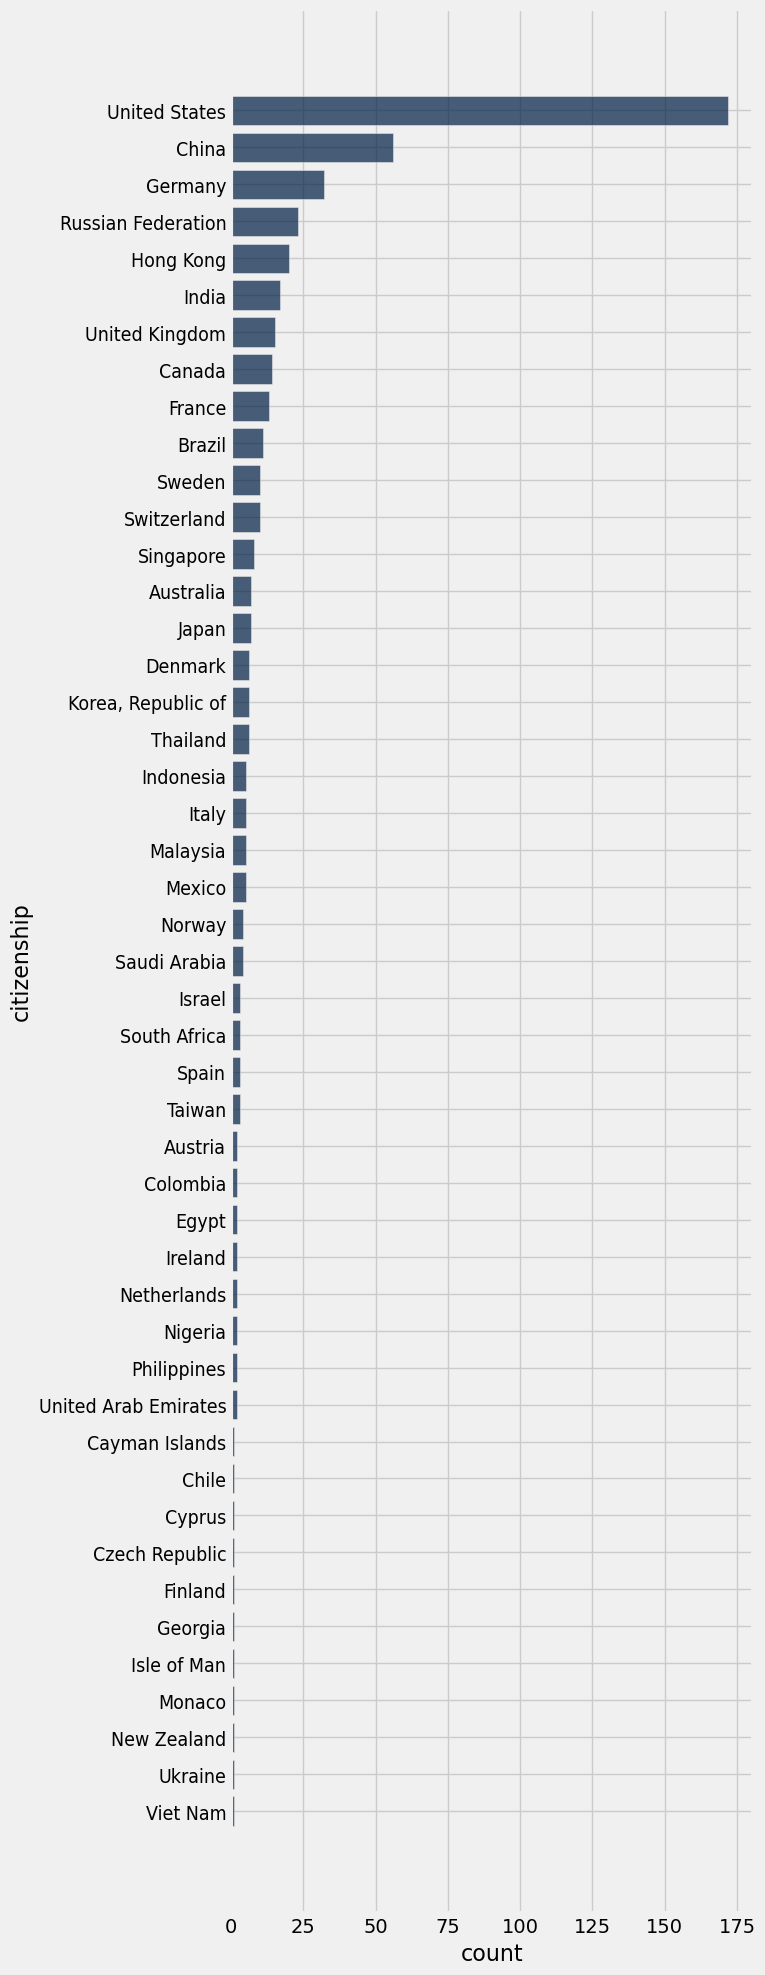

In [6]:
billionaires.group('citizenship').sort(1, descending=True).barh('citizenship')

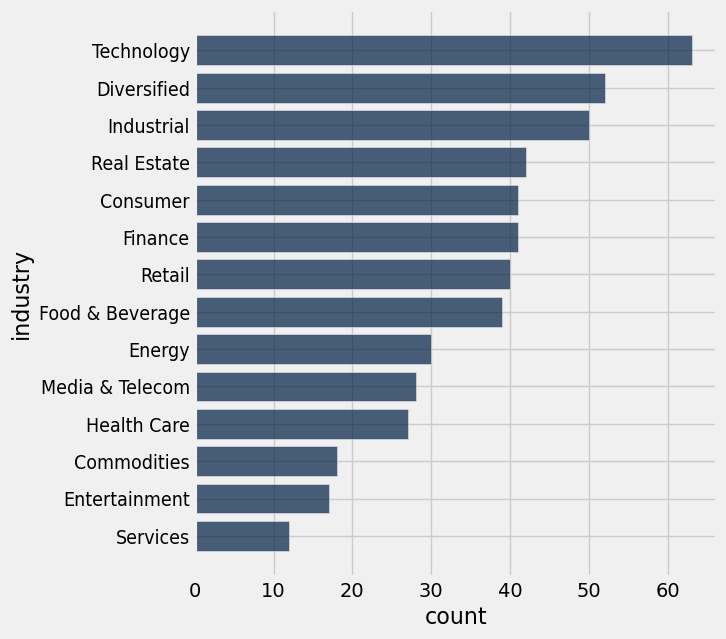

In [7]:
billionaires.group('industry').sort(1, descending=True).barh('industry')

In [8]:
billionaires.pivot('industry', 'citizenship').show()

citizenship,Commodities,Consumer,Diversified,Energy,Entertainment,Finance,Food & Beverage,Health Care,Industrial,Media & Telecom,Real Estate,Retail,Services,Technology
Australia,2,0,0,0,0,0,0,0,1,0,2,0,0,2
Austria,0,0,0,0,1,0,1,0,0,0,0,0,0,0
Brazil,1,0,0,0,0,5,3,0,1,0,0,0,0,1
Canada,1,0,0,1,0,0,1,0,0,7,0,3,0,1
Cayman Islands,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Chile,1,0,0,0,0,0,0,0,0,0,0,0,0,0
China,1,6,2,3,0,1,5,6,4,0,7,2,4,15
Colombia,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Cyprus,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Czech Republic,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
countries = Table.read_table('data/countries.csv')
countries

Continent,Country
Africa,Algeria
Africa,Angola
Africa,Benin
Africa,Botswana
Africa,Burkina
Africa,Burundi
Africa,Cameroon
Africa,Cape Verde
Africa,Central African Republic
Africa,Chad


In [10]:
countries.where('Continent', 'North America')

Continent,Country
North America,Antigua and Barbuda
North America,Bahamas
North America,Barbados
North America,Belize
North America,Canada
North America,Cayman Islands
North America,Costa Rica
North America,Cuba
North America,Dominica
North America,Dominican Republic


In [11]:
billionaires = billionaires.join('citizenship', countries, 'Country')
billionaires

citizenship,name,net worth,industry,Continent
Australia,Gina Rinehart,19984845036,Commodities,Oceania
Australia,Andrew Forrest,10221458789,Commodities,Oceania
Australia,Harry Triguboff,9467000000,Real Estate,Oceania
Australia,Scott Farquhar,9335988154,Technology,Oceania
Australia,Mike Cannon-Brookes,9335988154,Technology,Oceania
Australia,Frank Lowy,6655432824,Real Estate,Oceania
Australia,Anthony Pratt,6566000000,Industrial,Oceania
Austria,Dietrich Mateschitz,12251315379,Food & Beverage,Europe
Austria,Johann Graf,6509183360,Entertainment,Europe
Brazil,Jorge Paulo Lemann,23056345424,Food & Beverage,South America


In [12]:
billionaires.pivot('industry', 'Continent')

Continent,Commodities,Consumer,Diversified,Energy,Entertainment,Finance,Food & Beverage,Health Care,Industrial,Media & Telecom,Real Estate,Retail,Services,Technology
Africa,0,0,2,0,0,0,1,0,2,2,0,0,0,0
Asia,7,10,27,12,4,4,11,11,21,3,23,8,6,21
Europe,1,17,13,1,4,1,9,10,21,4,5,15,4,6
North America,6,14,10,17,9,29,14,6,4,19,12,17,2,33
Oceania,2,0,0,0,0,1,0,0,1,0,2,0,0,2
South America,2,0,0,0,0,6,4,0,1,0,0,0,0,1


In [14]:
# CEO Political Donation Data
# Amount measured in dollars
# During the 2016 election cycle
# Party -> 
#          100: Democrat Dontation
#          200: Republican Donation

ceos = Table.read_table('data/ceo.csv')
ceos

company,ceo,party,amount
3M Co,Bob Ulrich,200,8500
3M Co,Linda Alvarado,100,11244.6
3M Co,Robert Ulrich,200,591450
AES Corporation,Andres Gluski,100,6000
AES Corporation,Charles Rossotti,100,2500
AES Corporation,Charles Rossotti,200,1000
AES Corporation,John Koskinen,100,19000
AES Corporation,Kristina Johnson,100,28480
AES Corporation,Philip Lader,100,2500
AES Corporation,Philip Odeen,100,750


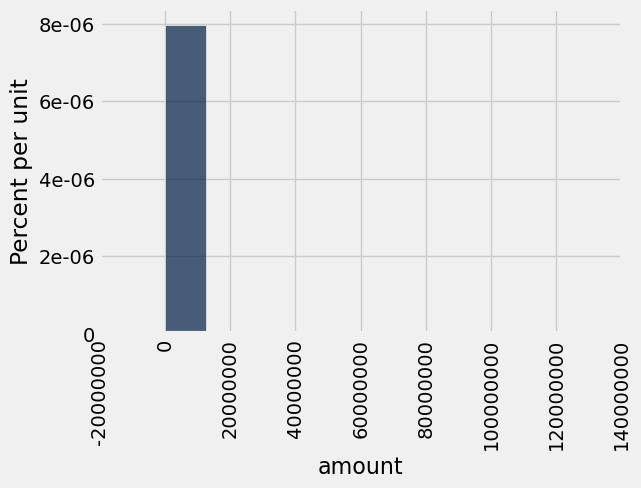

In [15]:
ceos.hist('amount')

In [16]:
ceos.sort('amount', descending=True).set_format('amount', NumberFormatter).show(100)

company,ceo,party,amount
Hewlett-Packard Co,Margaret Whitman,200,"125,273,206.11"
Caterpillar Inc,Jon Huntsman,200,"12,768,577.66"
Las Vegas Sands,Sheldon Adelson,200,"6,204,250.00"
Las Vegas Sands,Sheldon g Adelson,200,"5,000,000.00"
Visteon,Harry Wilson,200,"4,030,400.00"
Yahoo! Inc,Daniel Loeb,200,"2,512,550.00"
YRC Worldwide Inc,Matthew Doheny,200,"1,473,320.00"
Charles Schwab Corp,Charles Schwab,200,"1,236,400.00"
DTE Energy,James Nicholson,200,"986,850.00"
Limited Brance,Leslie Wexner,200,"942,800.00"


In [17]:
ceos.sort('amount', descending=False)

company,ceo,party,amount
Bristol-Myers Squibb Company,Robert Williams,100,9
Amgen Inc,Gil Omenn,100,10
Bristol-Myers Squibb Company,Michael Grobstein,100,10
Caterpillar Inc,Leon Patten,100,10
Caseys General Stores,Richard Wilkey,100,23
AK Steel,William Gerber,200,25
Hollyfrontier Corporation,Matthews Clifton,100,25
Nordstrom Inc,Alison Winter,100,25
Calpine,Rob Mosbacher,100,35
CF Industries Holdings,John Johnson,100,40


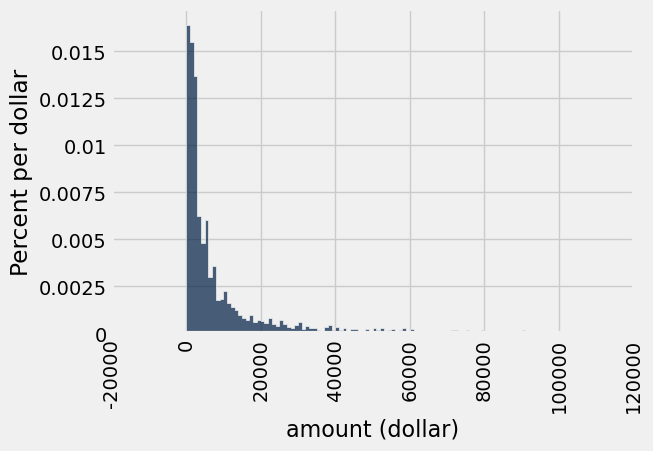

In [19]:
ceos.hist('amount', bins=np.arange(0, 1e5, 1e3), unit='dollar')

In [20]:
b_donations = billionaires.join('name', ceos, 'ceo')
b_donations.show()

name,citizenship,net worth,industry,Continent,company,party,amount
Barry Diller,United States,5479965153,Technology,North America,Coca-Cola Co,100,107500
Carl Icahn,United States,20515698449,Diversified,North America,CVR Energy,100,3000
Carl Icahn,United States,20515698449,Diversified,North America,CVR Energy,200,225900
Charles Dolan,United States,5387774353,Media & Telecom,North America,Cablevision,100,39400
Charles Dolan,United States,5387774353,Media & Telecom,North America,Cablevision,200,107000
Charles Johnson,United States,4587892463,Finance,North America,Franklin Resources,200,858000
Charles Koch,United States,61046822719,Industrial,North America,Assurant,100,1500
Charles Koch,United States,61046822719,Industrial,North America,Assurant,200,25400
Charles Schwab,United States,9063879795,Finance,North America,Charles Schwab Corp,100,1800
Charles Schwab,United States,9063879795,Finance,North America,Charles Schwab Corp,200,1.2364e+06


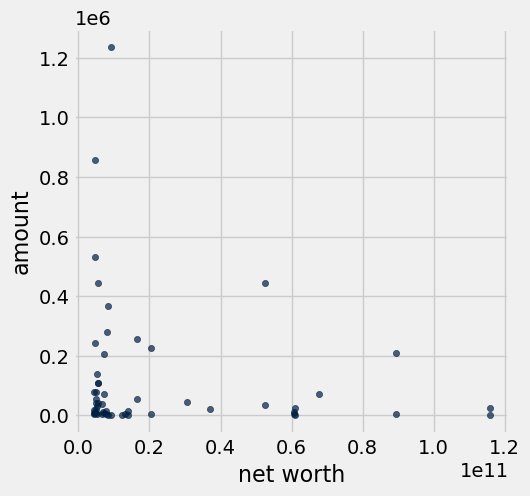

In [25]:
b_donations.where('amount', are.below(6e6)).scatter('net worth', 'amount')

In [27]:
donation_prop = b_donations.column('amount') / b_donations.column('net worth')
b_donations = b_donations.with_column('Contribution%', donation_prop)
b_donations = b_donations.sort('amount', descending=True)
b_donations.set_format('Contribution%', PercentFormatter)
b_donations.set_format('amount', NumberFormatter)
b_donations.show(20)

name,citizenship,net worth,industry,Continent,company,party,amount,Contribution%
Sheldon Adelson,United States,38008857087,Entertainment,North America,Las Vegas Sands,200,"6,204,250.00",0.02%
Charles Schwab,United States,9063879795,Finance,North America,Charles Schwab Corp,200,"1,236,400.00",0.01%
Charles Johnson,United States,4587892463,Finance,North America,Franklin Resources,200,"858,000.00",0.02%
Kelcy Warren,United States,4595072119,Energy,North America,Energy Transfer,200,"529,886.16",0.01%
Jim Walton,United States,52493506006,Retail,North America,Wal-Mart Stores Inc,200,"444,700.00",0.00%
Ray Hunt,United States,5421192714,Energy,North America,PepsiCo Inc,200,"442,364.00",0.01%
Richard Kinder,United States,8398076785,Energy,North America,Kinder Morgan,200,"367,999.52",0.00%
John Malone,United States,8069296402,Media & Telecom,North America,Liberty Global,200,"280,050.00",0.00%
Eric Schmidt,United States,16579148665,Technology,North America,google,100,"257,300.10",0.00%
Reed Hastings,United States,4569628489,Technology,North America,Facebook,100,"241,700.00",0.01%


In [28]:
True + False + True

2